In [32]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

In [33]:
results_path = 'results_v3'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [40]:
def process_results(results_path: str, ext: str = 'feather'):
    results_list = []

    # Read all the results from results/ directory
    for dirname in tqdm(os.listdir(results_path), desc='Reading results'):
        if 'images' not in dirname:
            if not os.path.isdir(f'{results_path}/{dirname}') or 'results' not in os.listdir(f'{results_path}/{dirname}'):
                continue
            for file in os.listdir(f'{results_path}/{dirname}/results'):
                if file.endswith(f'.{ext}'):
                    df = pd.read_feather(f'{results_path}/{dirname}/results/{file}')
                    
                    # Custom parsing kinda weird
                    if 'dt' in dirname:
                        df['base_model'] = 'DecisionTree'
                    else:
                        df['base_model'] = 'NeuralNetwork'
                        
                    if 'dice' in dirname:
                        df['base_cf_method'] = 'Dice'
                    else:
                        df['base_cf_method'] = 'GrowingSpheres'
                        
                    # Temporary fix for the experiment type
                    # ----------------------------
                    # exp_types = list(filter(lambda x: 'seed' not in x.lower(), df['experiment_type'].unique()))
                    # df = df[df['experiment_type'].isin(exp_types)]
                    # ----------------------------
                        
                    results_list.append(df)
    
    # Concatenate all the results
    raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
    return raw_df

In [41]:
raw_df = process_results(results_path)

Reading results: 100%|██████████| 13/13 [00:01<00:00,  7.18it/s]


In [42]:
raw_df = raw_df.dropna()

In [43]:
raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta,base_model
0,GrowingSpheres,neural_network,Architecture,wine_quality,32,0,Architecture,0.95,0.8,Model2_16,"[0.29166666666666674, 0.33999999999999997, 0.0...",0,0.134177,0,0.162082,0,"[0.34266639038977786, 0.282371830670793, -0.00...",0.628982,1,0.777445,1,1,0.610406,0.231086,0.226334,0.666667,1,0.003553,"[0.38906559796041834, 0.23180188032787186, -0....",0.883603,1,0.836019,1,1,0.878842,0.298114,0.289899,0.533333,1,0.281121,0.012227,2.943714,0,0,0,0,0.81428,0.81428,0.986785,NeuralNetwork
1,GrowingSpheres,neural_network,Architecture,wine_quality,32,0,Architecture,0.95,0.8,Model2_17,"[0.29166666666666674, 0.33999999999999997, 0.0...",0,0.134177,0,0.159168,0,"[0.34266639038977786, 0.282371830670793, -0.00...",0.628982,1,0.777445,1,1,0.610406,0.231086,0.226334,0.666667,1,0.003553,"[0.38202959727923075, 0.19235416062783373, -0....",0.852727,1,0.935098,1,1,0.937762,0.318672,0.304884,0.666667,1,0.390546,0.018280,2.931849,0,0,0,0,0.81428,0.81428,0.986785,NeuralNetwork
2,GrowingSpheres,neural_network,Architecture,wine_quality,32,0,Architecture,0.95,0.8,Model2_18,"[0.29166666666666674, 0.33999999999999997, 0.0...",0,0.134177,0,0.203477,0,"[0.34266639038977786, 0.282371830670793, -0.00...",0.628982,1,0.777445,1,1,0.610406,0.231086,0.226334,0.666667,1,0.003553,"[0.3528894677586933, 0.2420396574167726, -0.01...",0.806937,1,0.775603,1,1,0.790628,0.285363,0.236442,0.533333,1,0.420173,0.022720,2.911842,0,0,0,0,0.81428,0.81428,0.986785,NeuralNetwork


In [44]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50708 entries, 0 to 50707
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   base_cf_method                                  50708 non-null  object 
 1   model_type_to_use                               50708 non-null  object 
 2   experiment_type                                 50708 non-null  object 
 3   dataset_name                                    50708 non-null  object 
 4   k_mlps_in_B                                     50708 non-null  int64  
 5   fold_i                                          50708 non-null  int64  
 6   experiment_generalization_type                  50708 non-null  object 
 7   beta_confidence                                 50708 non-null  float64
 8   delta_robustness                                50708 non-null  float64
 9   model2_name                            

In [45]:
raw_df['base_model'].value_counts()

NeuralNetwork    50708
Name: base_model, dtype: int64

In [46]:
raw_df['base_cf_method'].value_counts()

Dice              27704
GrowingSpheres    23004
Name: base_cf_method, dtype: int64

In [14]:
# Reverse engineer the beta distribution parameters
# import scipy.stats as stats

# lb = 0.516128
# ub = 0.826645
# alpha = 0.95
# k = 32
# prior_a = 0.5
# prior_b = 0.5

# def find_beta_params(lb, ub, alpha, k, prior_a, prior_b):
#     # Find parameters of the beta distribution that result in the given credible interval
#     for a in range(k):
#         b = k - a
#         lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)
        
#         if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#             # print(f'Found a = {a}, b = {b}')
#             break
        
#     return a, b

# # find_beta_params(lb, ub, alpha, k, prior_a, prior_b)

# lbs = raw_df['lower_bound_beta']
# ubs = raw_df['upper_bound_beta']

# import multiprocessing


# def mp_find_beta_params(lb: list, ub: list, alpha: float, k: int, prior_a: float, prior_b: float, workers: int = 4):
    
#     def find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b):
        
#         r = []
#         for i, (lb, ub) in enumerate(zip(lbs, ubs)):
#             # Find parameters of the beta distribution that result in the given credible interval
#             for a in range(k):
#                 b = k - a
#                 lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)

#                 if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#                     r.append((a, b))
#                     break
#             if i % 1000 == 0:
#                 print(f'Processed {i} elements')
#         return r
    
#     processes = []
    
#     for i in range(workers):
#         n = len(lb)
#         chunks = np.array_split(np.arange(n), workers)
        
#         lb_part = lb[chunks[i]]
#         ub_part = ub[chunks[i]]
        
#         print(f'Processing {len(lb_part)} elements')
        
#         p = multiprocessing.Process(target=find_beta_params, args=(lb_part, ub_part, alpha, k, prior_a, prior_b))
#         processes.append(p)
#         p.start()
        
#     results = []
    
#     for p in processes:
#         p.join()
#         results.append(p)
    
#     return results

# results = mp_find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b, workers=4)

# raw_df['beta_alpha'], raw_df['beta_beta'] = zip(*results)


# raw_df['beta_alpha'] = raw_df['beta_alpha'].astype(int)
# raw_df['beta_beta'] = raw_df['beta_beta'].astype(int)

# raw_df['beta_alpha'].value_counts()

In [47]:
nn_gs_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
nn_dice_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'Dice')]
nn_df = raw_df[raw_df['base_model'] == 'NeuralNetwork']
dt_gs_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
dt_dice_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'Dice')]
dt_df = raw_df[raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}')

Lengths of the dataframes: NN GS: 23004, NN Dice: 27704, DT GS: 0, DT Dice: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

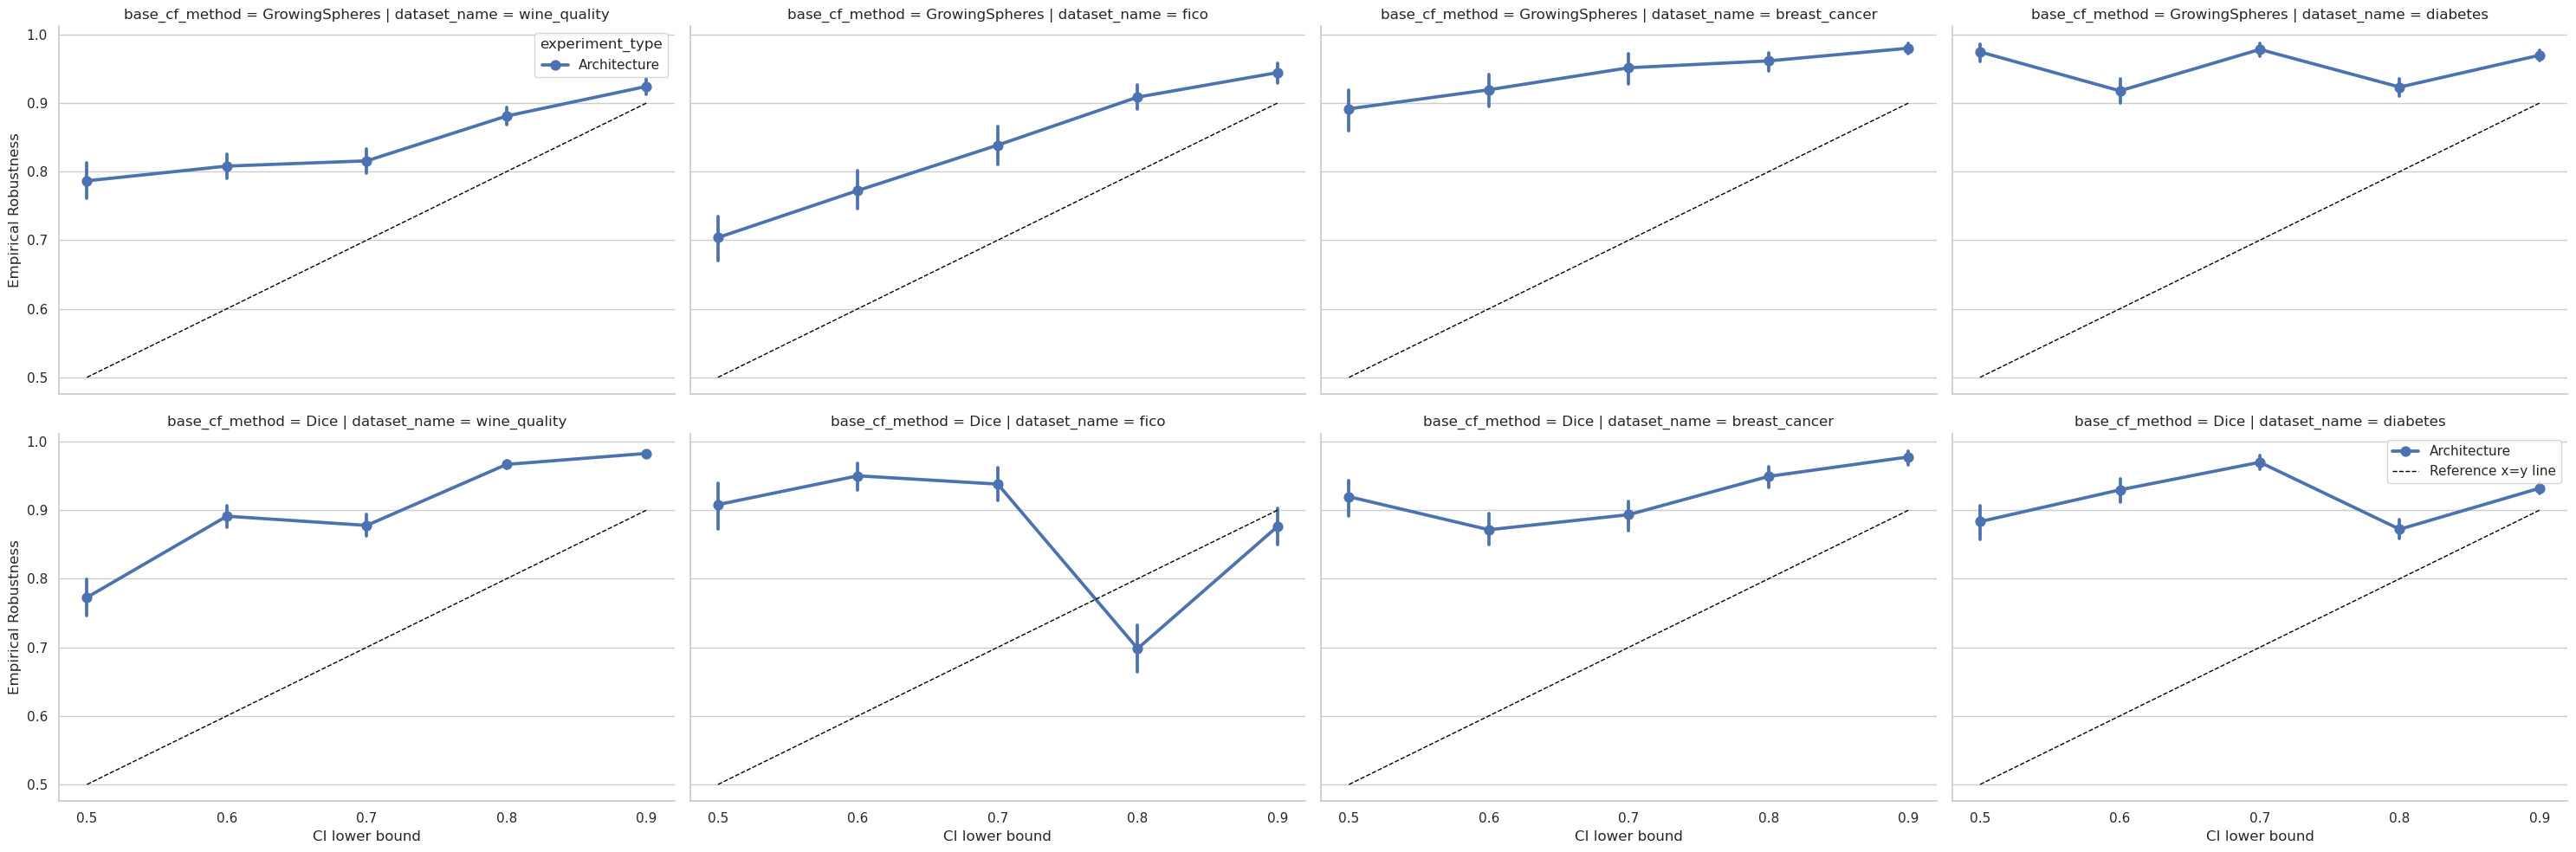

In [48]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = nn_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)


g = sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            row='base_cf_method',
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
            legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(list(range(5)), lb_threshs[:-1], color='black', linestyle='--', linewidth=1, label='Reference x=y line')

plt.legend()
plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

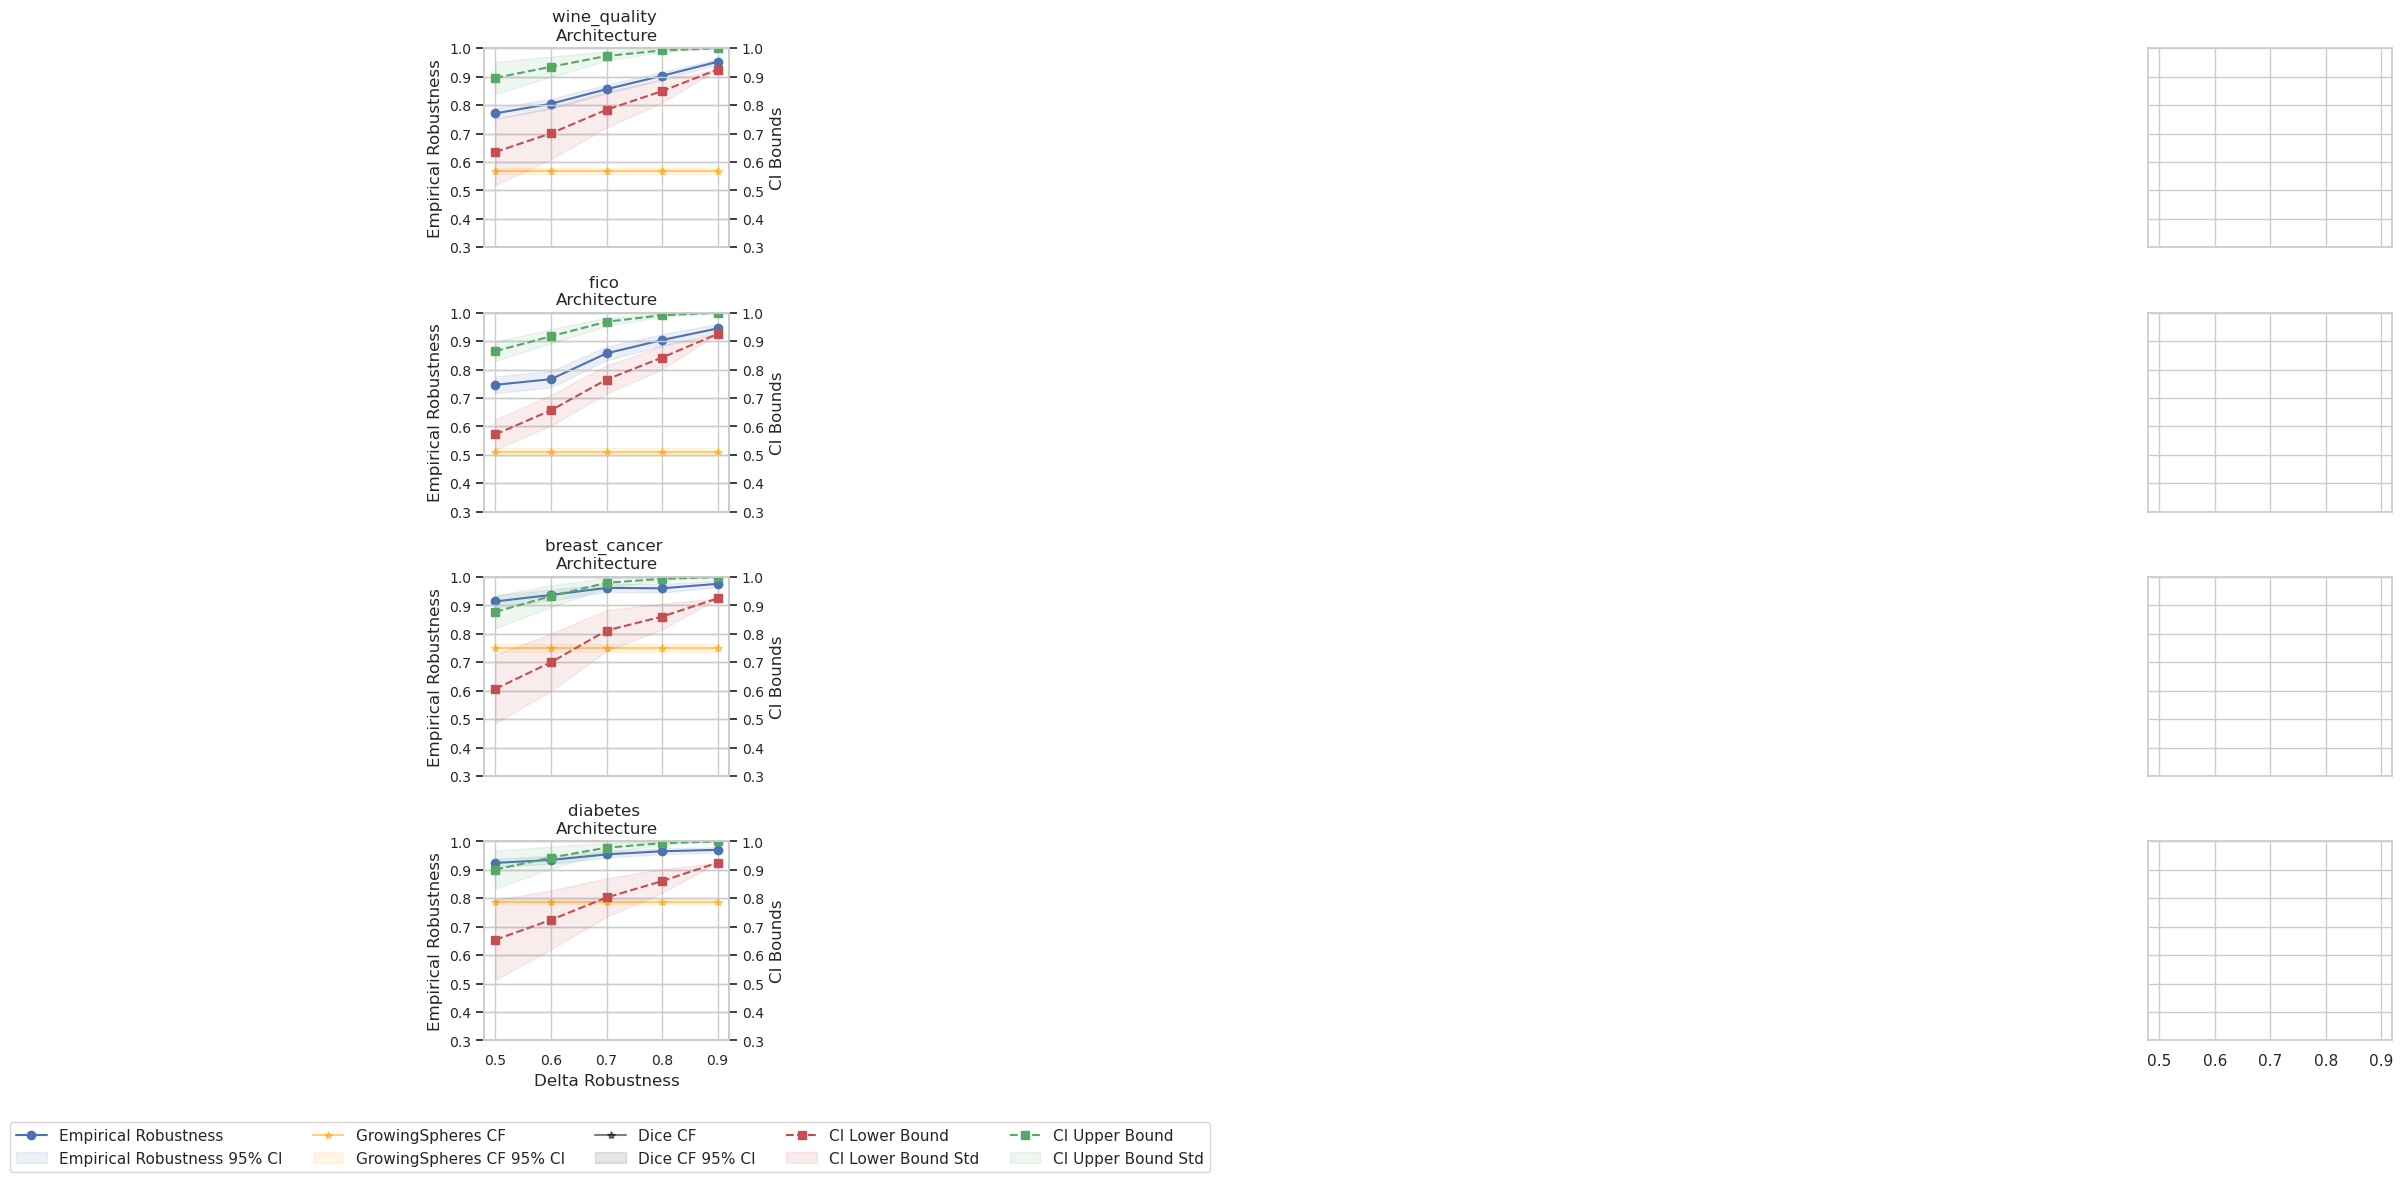

In [50]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_gs_df.copy()
method='GrowingSpheres'

datasets = _tmp_df['dataset_name'].unique()
experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(experiment_types), figsize=(20, 12), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        ax.set_title(f'{dataset} \n{experiment_type}')
        
        if i == len(datasets) - 1:
            ax.set_xlabel('Delta Robustness')
        # ax.set_xlabel('Delta Robustness')
        if j == 0:
            ax.set_ylabel('Empirical Robustness')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        
        if j == len(experiment_types) - 1:
            ax2.set_ylabel('CI Bounds')
        
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
        
        
        #Plot baseline
        for m, color in zip(['GrowingSpheres', 'Dice'], ['orange', 'black']):
            __df = _df[_df['base_cf_method'] == m]
            base = __df['base_counterfactual_validity_model2'].mean()
            base_std = __df['base_counterfactual_validity_model2'].std()
            base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
            ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
            ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
        
        l = 0.3
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        # Make x-axis labels more coarse i.e. only show rounded to tenths

        # ax_lim = ax.get_xlim()
        # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
        
        if i == len(datasets) - 1 and j == 0:
            ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
            ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
            
            ax.legend(ax_legend_handles + ax2_legend_handles, 
                      ax_legend_labels + ax2_legend_labels, 
                      ncol=5, 
                      loc='lower right',
                      bbox_to_anchor=(3, -0.7)
            )
            
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
           
plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [223]:
robx_results_path = results_path + '/robx'
robx_raw_df = process_results(robx_results_path)

Reading results: 100%|██████████| 6/6 [00:27<00:00,  4.65s/it]


In [224]:
robx_raw_df.head(3)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,base_model,base_cf_method
0,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_11,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.154468,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.781320329851132, 0.47118805600911506, 0.142...",0.768958,1.0,0.790490,1.0,1.0,4.568437,1.369972,0.629106,0.733333,1.0,3.175778,0.588829,1.728497,NeuralNetwork,Dice
1,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_12,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.150520,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.758044343040405, 0.3392046499079913, 0.0424...",0.769096,1.0,0.833800,1.0,1.0,4.745955,1.465955,0.630485,0.800000,1.0,3.126429,0.699320,0.972858,NeuralNetwork,Dice
2,Architecture,fico,32,1,Architecture,0.5,0.1,Model2_13,"[0.5094339622641509, 0.2707964601769911, 0.015...",0,0.107052,0,0.117296,0,"[0.5094339622641509, 0.2707964601769911, 0.015...",0.570142,1,0.587248,1,1,1.619526,1.152266,0.913642,0.533333,1,0.166199,"[0.781320329851132, 0.47118805600911506, 0.142...",0.768958,1.0,0.830251,1.0,1.0,4.568437,1.369972,0.629106,0.733333,1.0,3.175778,0.588829,1.882773,NeuralNetwork,Dice


In [225]:
robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'}, inplace=True)

In [226]:
robx_nn_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_nn_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_nn_df = robx_raw_df[robx_raw_df['base_model'] == 'NeuralNetwork']
robx_dt_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_dt_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_dt_df = robx_raw_df[robx_raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}')

Lengths of the dataframes: NN GS: 202501, NN Dice: 108000, DT GS: 44901, DT Dice: 49201


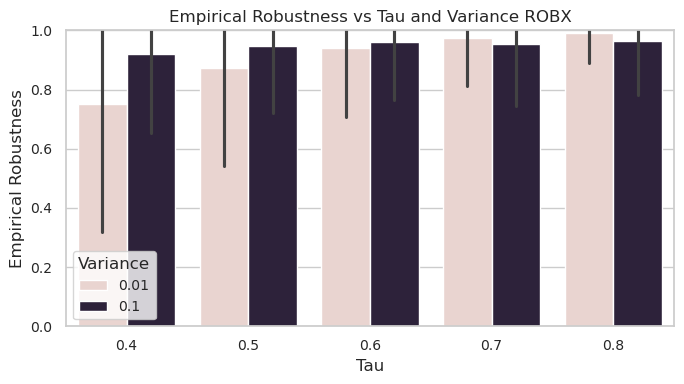

In [227]:
fig, ax = plt.subplots(figsize=(7, 4))
# Change font size
sns.set_theme(style='whitegrid', font_scale=1)
sns.barplot(data=robx_raw_df, x='tau', y='robust_counterfactual_validity_model2', hue='variance', errorbar='sd')
plt.title('Empirical Robustness vs Tau and Variance ROBX')
plt.ylabel('Empirical Robustness')
plt.xlabel('Tau')
plt.ylim(0, 1)

# Change font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend font size
plt.legend(fontsize=10, title='Variance')

plt.tight_layout()
plt.savefig(f'{images_dir}/3_empirical_robustness_vs_tau_variance.png', dpi=300, bbox_inches='tight')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


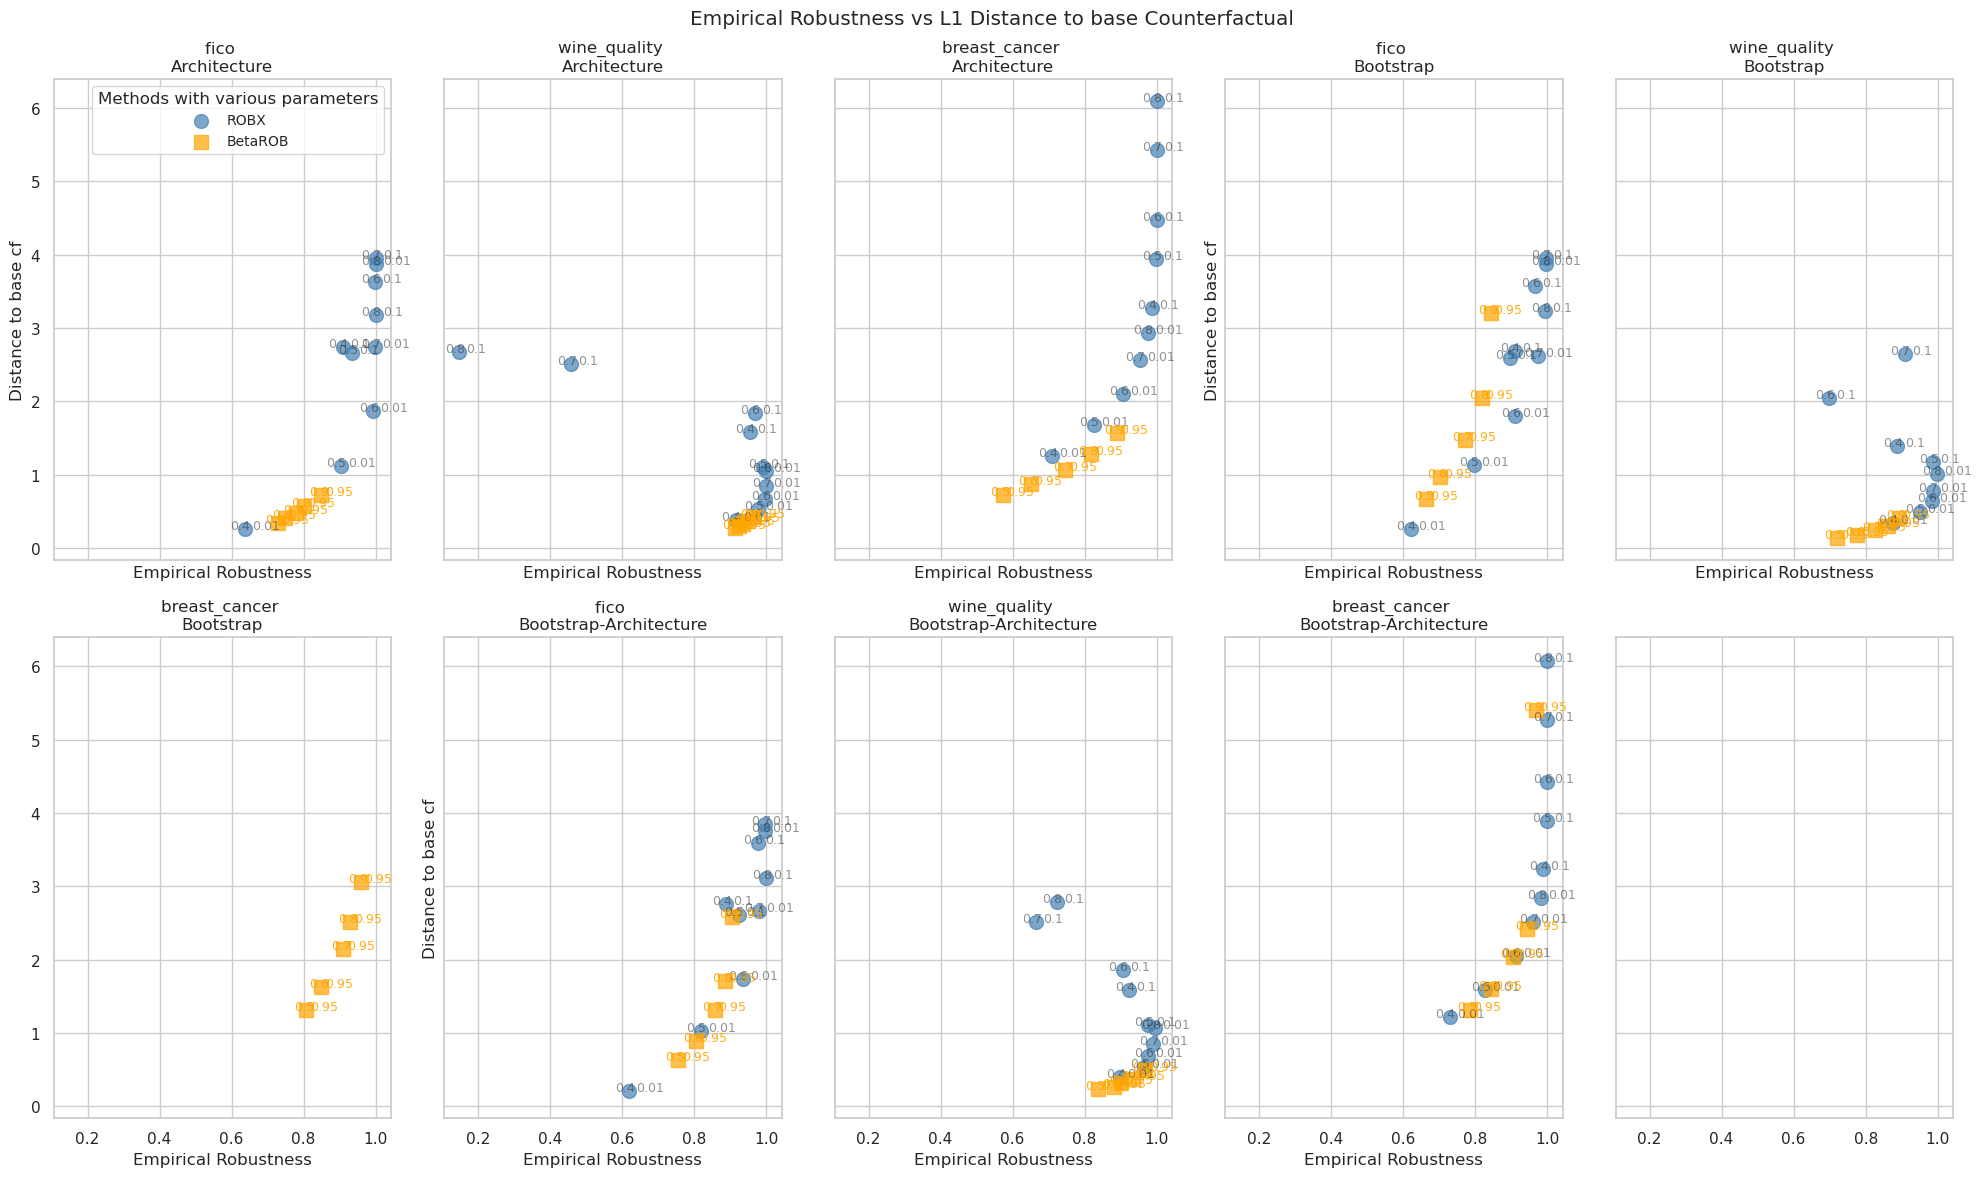

In [228]:
_robx_tmp_df = robx_nn_gs_df.copy()
_betarob_tmp_df = nn_gs_df.copy()


datasets = _robx_tmp_df['dataset_name'].unique()
experiment_types = _robx_tmp_df['experiment_type'].unique()

rows = len(experiment_types) // 2 + 1
cols = len(datasets) + len(experiment_types) // 2 + len(experiment_types) % 2

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 12), sharex=True, sharey=True)




ax = axes.flatten()
ite = 0
for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        
        
        tmp_robx_df = _robx_tmp_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_validity_model2'].mean().reset_index()
        robx_agg_dist_to_baseline = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()
        
        tmp_raw_df = _betarob_tmp_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_validity_model2'].mean().reset_index()  
        betarob_agg_dist_to_baseline = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()


        # Create scatter plot of dist vs empirical for both ROBX and BetaROB
        robx_merge = pd.merge(robx_agg_empirical, robx_agg_dist_to_baseline, on=['tau', 'variance'], suffixes=('_empirical', '_dist'))
        robx_merge['tau_var'] = robx_merge['tau'].astype(str) + '_' + robx_merge['variance'].astype(str)

        betarob_merge = pd.merge(betarob_agg_empirical, betarob_agg_dist_to_baseline, left_on=['delta_robustness', 'beta_confidence'], right_on=['delta_robustness', 'beta_confidence'], suffixes=('_empirical', '_dist'))
        betarob_merge['delta_beta'] = betarob_merge['delta_robustness'].astype(str) + '_' + betarob_merge['beta_confidence'].astype(str)
        
        ax[ite].scatter(x=robx_merge['robust_counterfactual_validity_model2'],
                    y=robx_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='steelblue',
                    marker='o',
                    s=100,
                    # cmap='tab10',
                    label='ROBX',
                    alpha=0.7
        )
        
        ax[ite].scatter(x=betarob_merge['robust_counterfactual_validity_model2'],
                    y=betarob_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='orange',
                    marker='s',
                    s=100,
                    # cmap='tab10',
                    label='BetaROB',
                    alpha=0.7
        )
        

        ax[ite].set_xlabel('Empirical Robustness')
        
        if j == 0:
            ax[ite].set_ylabel('Distance to base cf')
        ax[ite].set_title(f'{dataset} \n{experiment_type}')
        
        if i == 0 and j == 0:
            ax[ite].legend(title='Methods with various parameters', fontsize=10)
            
            
        # Add labels to the points
        for k, row in robx_merge.iterrows():
            ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.04, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['tau'], 
                         fontsize=9, 
                         alpha=0.5
            )
            ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.02, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['variance'], 
                         fontsize=9, 
                         alpha=0.5
            )
        for k, row in betarob_merge.iterrows():
            ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.035, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['delta_robustness'], 
                         fontsize=9, 
                         alpha=0.9,
                         color='#ffa500',
            )
            ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.01, 
                         row['robust_counterfactual_L1_distance_from_base_cf'] , 
                         row['beta_confidence'], 
                         fontsize=9, 
                         alpha=0.9,
                        color='#ffa500',
            )
        
        ite += 1
            


plt.suptitle('Empirical Robustness vs L1 Distance to base Counterfactual')
plt.tight_layout()

plt.savefig(f'{images_dir}/3_empirical_robustness_vs_l1_distance.png', dpi=300, bbox_inches='tight')


In [243]:
final_df = pd.DataFrame()

_robx_df = robx_nn_gs_df.copy()
_betarob_df = raw_df.copy()

for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        tmp_robx_df = _robx_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])[[
            'robust_counterfactual_validity_model2',
            'robust_counterfactual_L1_distance_from_base_cf',
            'robust_counterfactual_proximityL1',
            'robust_counterfactual_plausibility',
            'robust_counterfactual_discriminative_power'
        ]].mean().reset_index()
        robx_agg_empirical['Name'] = 'ROBX-' + robx_agg_empirical['tau'].astype(str) + '-' + robx_agg_empirical['variance'].astype(str)
        robx_agg_empirical = robx_agg_empirical.drop(columns=['tau', 'variance'])
        robx_agg_empirical.rename(columns={
            'robust_counterfactual_validity_model2': 'Empirical Robustness',
            'robust_counterfactual_L1_distance_from_base_cf': 'L1 Distance',
            'robust_counterfactual_proximityL1': 'Proximity L1',
            'robust_counterfactual_plausibility': 'Plausibility',
            'robust_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)
        
        
        tmp_raw_df = _betarob_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(
            ['delta_robustness', 'beta_confidence']
            )[[
                'robust_counterfactual_validity_model2', 
                'robust_counterfactual_L1_distance_from_base_cf',
                'robust_counterfactual_proximityL1',
                'robust_counterfactual_plausibility',
                'robust_counterfactual_discriminative_power'
            ]].mean().reset_index()  
        betarob_agg_empirical['Name'] = 'BetaRCE-' + betarob_agg_empirical['delta_robustness'].astype(str) + '-' + betarob_agg_empirical['beta_confidence'].astype(str)
        betarob_agg_empirical = betarob_agg_empirical.drop(columns=['delta_robustness', 'beta_confidence'])
        betarob_agg_empirical.rename(columns={
            'robust_counterfactual_validity_model2': 'Empirical Robustness',
            'robust_counterfactual_L1_distance_from_base_cf': 'L1 Distance',
            'robust_counterfactual_proximityL1': 'Proximity L1',
            'robust_counterfactual_plausibility': 'Plausibility',
            'robust_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)
        
        # Add baseline of base cf methods
        tmp_method_df = _betarob_df.copy()
        tmp_method_df = tmp_method_df[(tmp_method_df['dataset_name'] == dataset) & (tmp_method_df['experiment_type'] == experiment_type)]
        tmp_method_df['robust_counterfactual_validity_model2'] = tmp_method_df['robust_counterfactual_validity_model2'].astype(float)
        method_agg_empirical = tmp_method_df.groupby(
            ['base_cf_method'] 
            )[[
                'base_counterfactual_validity_model2', 
                'base_counterfactual_proximityL1',
                'base_counterfactual_plausibility',
                'base_counterfactual_discriminative_power'
            ]].mean().reset_index()
        method_agg_empirical['Name'] = method_agg_empirical['base_cf_method']
        method_agg_empirical = method_agg_empirical.drop(columns=['base_cf_method'])
        method_agg_empirical.rename(columns={
            'base_counterfactual_validity_model2': 'Empirical Robustness',
            'base_counterfactual_proximityL1': 'Proximity L1',
            'base_counterfactual_plausibility': 'Plausibility',
            'base_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)   
        
        print(f'ROBX: {robx_agg_empirical.shape}, BetaROB: {betarob_agg_empirical.shape}, Method: {method_agg_empirical.shape}')
        
        joint_df = pd.concat([robx_agg_empirical, betarob_agg_empirical, method_agg_empirical], ignore_index=True)
        joint_df['Dataset'] = dataset
        joint_df['Experiment Type'] = experiment_type
        
        final_df = pd.concat([final_df, joint_df], ignore_index=True)

ROBX: (10, 6), BetaROB: (5, 6), Method: (2, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (2, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (1, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (2, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (2, 5)
ROBX: (0, 6), BetaROB: (5, 6), Method: (1, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (1, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (1, 5)
ROBX: (10, 6), BetaROB: (5, 6), Method: (1, 5)


In [247]:
vis_df = final_df.set_index(['Experiment Type', 'Dataset' , 'Name']).round(3)
# vis_df = vis_df[np.abs(vis_df['Empirical Robustness'] - 0.85) < 0.1]
vis_df = vis_df[vis_df.index.get_level_values('Experiment Type').str.contains('')]
vis_df = vis_df[~vis_df.index.get_level_values('Dataset').str.contains('breast_cancer')]

vis_df['distto90'] = np.abs(vis_df['Empirical Robustness'] - 0.9)

# # For each combination of experiment type and dataset, show the top 2 results of ROBX and BetaROB closest to 0.85 empirical robustness
vis_df_rob = vis_df[vis_df.index.get_level_values('Name').str.contains('ROBX')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_betarob = vis_df[vis_df.index.get_level_values('Name').str.contains('BetaRCE')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_dice = vis_df[vis_df.index.get_level_values('Name').str.contains('Dice')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_method = vis_df[vis_df.index.get_level_values('Name').str.contains('D')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(1, 'distto90'))
# print(vis_df_method)

# Drop extra index level
vis_df_rob.index = vis_df_rob.index.droplevel([2,3])
vis_df_betarob.index = vis_df_betarob.index.droplevel([2,3])
# vis_df_method = vis_df_method.droplevel([2])

# Join on the index
vis_df_final = pd.concat([vis_df_rob, vis_df_betarob, vis_df_method_dice, vis_df_method_gs], axis=0)


# # Organize the index
# vis_df_final = vis_df_final.sort_index() 

# Swap the levels
vis_df_final = vis_df_final.swaplevel(0, 1)
vis_df_final = vis_df_final.sort_index() 

# # Drop the distto90 column
vis_df_final = vis_df_final.drop(columns=['distto90'])


vis_df_final

/tmp/ipykernel_5515/1993360284.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
/tmp/ipykernel_5515/1993360284.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this w

Empirical Robustness  \
Dataset      Experiment Type        Name                                     
fico         Architecture           BetaRCE-0.8-0.95                 0.729   
                                    BetaRCE-0.9-0.95                 0.753   
                                    Dice                             0.558   
                                    GrowingSpheres                   0.463   
                                    ROBX-0.4-0.1                     0.909   
                                    ROBX-0.5-0.01                    0.903   
             Bootstrap              BetaRCE-0.8-0.95                 0.799   
                                    BetaRCE-0.9-0.95                 0.837   
                                    Dice                             0.498   
                                    GrowingSpheres                   0.544   
                                    ROBX-0.4-0.1                     0.910   
                                    ROBX-0.5-0.1                     0.896   
             Bootstrap-Architecture BetaRCE-0.8-0.95                 0.885   
                                    BetaRCE-0.9-0.95                 0.905   
                                    GrowingSpheres                   0.570   
                                    ROBX-0.4-0.1                     0.890   
                                    ROBX-0.5-0.1                     0.924   
wine_quality Architecture           BetaRCE-0.8-0.95                 0.866   
                                    BetaRCE-0.9-0.95                 0.889   
                                    Dice                             0.682   
                                    GrowingSpheres                   0.476   
                                    ROBX-0.4-0.01                    0.916   
                                    ROBX-0.4-0.1                     0.955   
             Bootstrap              BetaRCE-0.8-0.95                 0.841   
                                    BetaRCE-0.9-0.95                 0.869   
                                    Dice                             0.612   
                                    GrowingSpheres                   0.603   
                                    ROBX-0.4-0.1                     0.888   
                                    ROBX-0.7-0.1                     0.909   
             Bootstrap-Architecture BetaRCE-0.6-0.95                 0.883   
                                    BetaRCE-0.7-0.95                 0.902   
                                    GrowingSpheres                   0.499   
                                    ROBX-0.4-0.01                    0.899   
                                    ROBX-0.6-0.1                     0.905   

                                                      L1 Distance  \
Dataset      Experiment Type        Name                            
fico         Architecture           BetaRCE-0.8-0.95        0.971   
                                    BetaRCE-0.9-0.95        1.158   
                                    Dice                      NaN   
                                    GrowingSpheres            NaN   
                                    ROBX-0.4-0.1            2.741   
                                    ROBX-0.5-0.01           1.118   
             Bootstrap              BetaRCE-0.8-0.95        2.405   
                                    BetaRCE-0.9-0.95        3.327   
                                    Dice                      NaN   
                                    GrowingSpheres            NaN   
                                    ROBX-0.4-0.1            2.692   
                                    ROBX-0.5-0.1            2.595   
             Bootstrap-Architecture BetaRCE-0.8-0.95        1.711   
                                    BetaRCE-0.9-0.95        2.579   
                                    GrowingSpheres            NaN   
                                    ROBX-0.4-0.1            2.754   
   

In [248]:
# Rename the columns to shorter names
vis_df_final.columns = ['Emp. Rob.', 'Dist. to Base', 'Prox. L1', 'Plaus.', 'Disc. Pow.']
# Rename Experiment types to shorter names
vis_df_final = vis_df_final.rename(index={'Architecture': 'Arch.', 'Bootstrap': 'Btstrp.', 'Bootstrap-Architecture': 'Btstrp. Arch.'})
# Rename datasets to shorter names
vis_df_final = vis_df_final.rename(index={'fico': 'HELOC', 'wine_quality': 'Wine'})

# Create latex table with .3f precision
latex_table = vis_df_final.style \
        .format(precision=3) \
        .to_latex(
            caption='Top 2 results closest to 0.85 empirical robustness for RobX and BetaRCE.',
            label='tab:comparison',
        )

# Save the latex table
with open(f'{images_dir}/4_empirical_robustness_closest_to_0.85.tex', 'w') as f:
    f.write(latex_table)

In [251]:
vis_df = final_df.set_index(['Experiment Type', 'Dataset' , 'Name']).round(3)
# vis_df = vis_df[np.abs(vis_df['Empirical Robustness'] - 0.85) < 0.1]
vis_df = vis_df[vis_df.index.get_level_values('Experiment Type').str.contains('')]
# vis_df = vis_df[~vis_df.index.get_level_values('Dataset').str.contains('breast_cancer')]

vis_df['distto90'] = np.abs(vis_df['Empirical Robustness'] - 0.9)

# # For each combination of experiment type and dataset, show the top 2 results of ROBX and BetaROB closest to 0.85 empirical robustness
vis_df_rob = vis_df[vis_df.index.get_level_values('Name').str.contains('ROBX')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_betarob = vis_df[vis_df.index.get_level_values('Name').str.contains('BetaRCE')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_dice = vis_df[vis_df.index.get_level_values('Name').str.contains('Dice')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_method = vis_df[vis_df.index.get_level_values('Name').str.contains('D')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(1, 'distto90'))
# print(vis_df_method)

# Drop extra index level
vis_df_rob.index = vis_df_rob.index.droplevel([2,3])
vis_df_betarob.index = vis_df_betarob.index.droplevel([2,3])
# vis_df_method = vis_df_method.droplevel([2])

# Join on the index
vis_df_final = pd.concat([vis_df_rob, vis_df_betarob, vis_df_method_dice, vis_df_method_gs], axis=0)


# # Organize the index
# vis_df_final = vis_df_final.sort_index() 

# Swap the levels
vis_df_final = vis_df_final.swaplevel(0, 1)
vis_df_final = vis_df_final.sort_index() 

# # Drop the distto90 column
vis_df_final = vis_df_final.drop(columns=['distto90'])

# Rename the columns to shorter names
vis_df_final.columns = ['Emp. Rob.', 'Dist. to Base', 'Prox. L1', 'Plaus.', 'Disc. Pow.']
# Rename Experiment types to shorter names
vis_df_final = vis_df_final.rename(index={'Architecture': 'Arch.', 'Bootstrap': 'Btstrp.', 'Bootstrap-Architecture': 'Btstrp. Arch.'})
# Rename datasets to shorter names
vis_df_final = vis_df_final.rename(index={'fico': 'HELOC', 'wine_quality': 'Wine', 'breast_cancer': 'Br. Cancer'})

# Create latex table with .3f precision
latex_table = vis_df_final.style \
        .format(precision=3) \
        .to_latex(
            caption='Top 2 results closest to 0.9 empirical robustness for RobX and BetaRCE.',
            label='tab:comparison',
        )

# Save the latex table
with open(f'{images_dir}/4_empirical_robustness_closest_to_0.85_APPENDIX.tex', 'w') as f:
    f.write(latex_table)

/tmp/ipykernel_5515/2439424001.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
/tmp/ipykernel_5515/2439424001.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this w

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [42]:
conf_sweep_results_path = results_path + '/conf_sweep'
conf_sweep_raw_df = process_results(conf_sweep_results_path)

Reading results: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


In [43]:
conf_sweep_raw_df['beta_confidence'].value_counts()

0.90    4050
0.95    4050
0.99    4050
0.70    4050
0.80    4050
Name: beta_confidence, dtype: int64

In [44]:
conf_sweep_raw_df['delta_robustness'].value_counts()

0.7    6750
0.8    6750
0.9    6750
Name: delta_robustness, dtype: int64

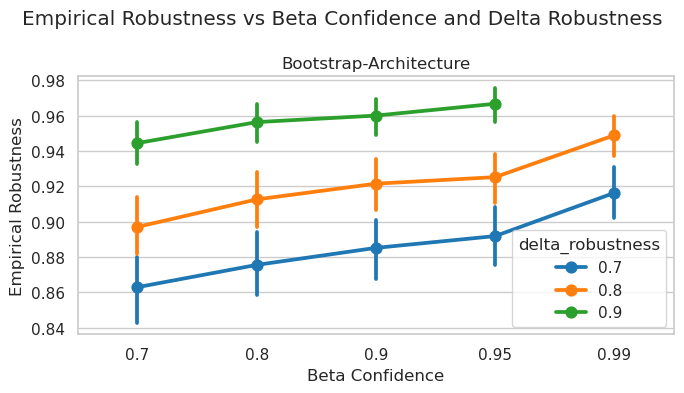

In [45]:
experiments = conf_sweep_raw_df['experiment_type'].unique()

figwidth = 7
fig, axes = plt.subplots(ncols=len(experiments), figsize=(figwidth, 4), sharex=True, sharey=True)

for i, experiment in enumerate(experiments):
    
    ax = axes[i] if len(experiments) > 1 else axes
    
    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df['experiment_type'] == experiment]
    
    sns.pointplot(data=tmp_conf_df, 
                  x='beta_confidence', 
                  y='robust_counterfactual_validity_model2', 
                  hue='delta_robustness', 
                  ax=ax,
                  palette='tab10',
                  legend=True if i == len(experiments) - 1 else False
    )
    
    ax.set_title(experiment)
    ax.set_xlabel('Beta Confidence')
    if i == 0:
        ax.set_ylabel('Empirical Robustness')
        
    plt.suptitle('Empirical Robustness vs Beta Confidence and Delta Robustness')
    
plt.tight_layout()
plt.savefig(f'{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png', dpi=300, bbox_inches='tight')
    
   

/tmp/ipykernel_6995/2257742370.py:107: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


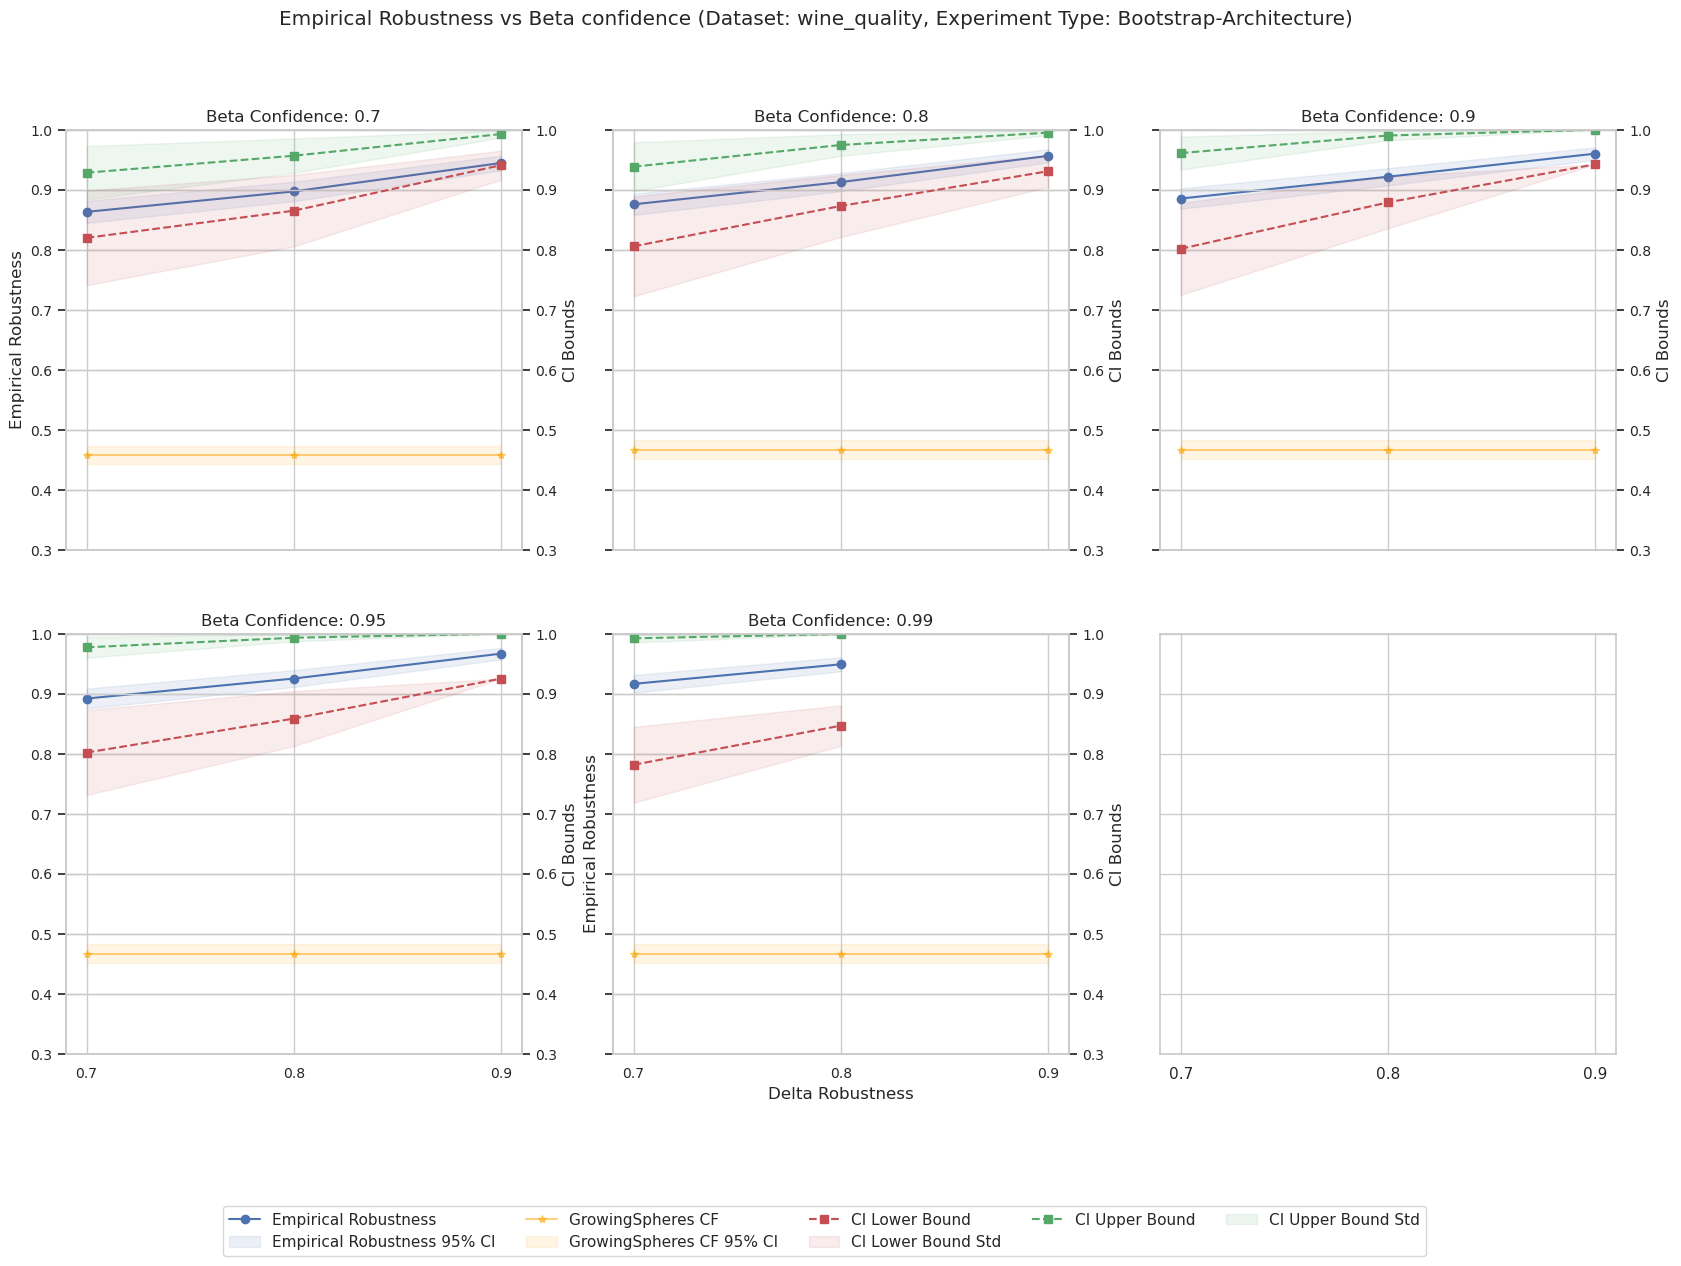

In [46]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
method='GrowingSpheres'

conf = sorted(_tmp_df['beta_confidence'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df['beta_confidence'] == c)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'Beta Confidence: {c}')
    
    if i >= 4:
        ax.set_xlabel('Delta Robustness')
    # ax.set_xlabel('Delta Robustness')
    if i == 0 or i == 4:
        ax.set_ylabel('Empirical Robustness')
    
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if j == len(experiment_types) - 1:
        ax2.set_ylabel('CI Bounds')
    
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
    
    
    #Plot baseline
    for m, color in zip(['GrowingSpheres'], ['orange']):
        __df = _df[_df['base_cf_method'] == m]
        base = __df['base_counterfactual_validity_model2'].mean()
        base_std = __df['base_counterfactual_validity_model2'].std()
        base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
        ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
        ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
    
    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
    
    if i == 3:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
        
        ax.legend(ax_legend_handles + ax2_legend_handles, 
                    ax_legend_labels + ax2_legend_labels, 
                    ncol=5, 
                    loc='lower right',
                    bbox_to_anchor=(3, -0.5)
        )
        
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])


dataset =  _tmp_df['dataset_name'].unique()[0]
experiment_type = _tmp_df['experiment_type'].unique()[0]
plt.suptitle(f'Empirical Robustness vs Beta confidence (Dataset: {dataset}, Experiment Type: {experiment_type})')        
plt.savefig(f'{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (confidence sweep)</div>

In [1]:
k_sweep_results_path = results_path + '/k_sweep'
k_raw_df = process_results(k_sweep_results_path)

NameError: name 'results_path' is not defined

In [53]:
k_raw_df['delta_robustness'].value_counts()

0.5    36421
0.6    36411
0.8    36390
0.9    36390
0.7    36390
Name: delta_robustness, dtype: int64

In [54]:
k_raw_df['k_mlps_in_B'].value_counts()

8     40500
16    35901
24    27000
32    27000
36    27000
44    24601
Name: k_mlps_in_B, dtype: int64

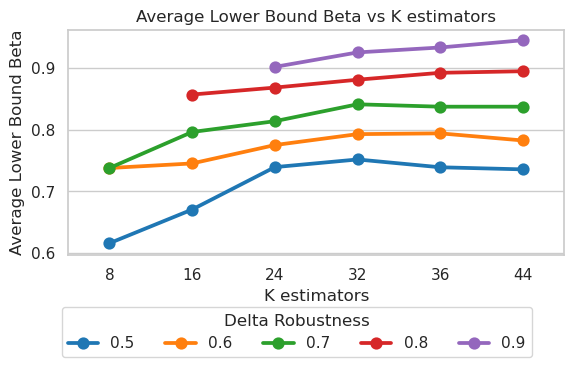

In [93]:
fig, axes = plt.subplots(figsize=(6, 4))

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='lower_bound_beta',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Average Lower Bound Beta vs K estimators')
plt.xlabel('K estimators')
plt.ylabel('Average Lower Bound Beta')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_lb_beta_vs_k_mlps.png', dpi=300, bbox_inches='tight')

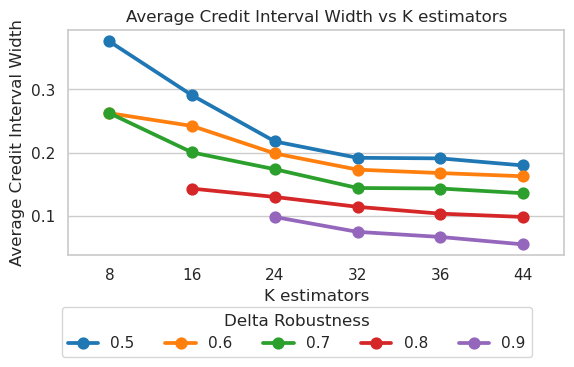

In [94]:
fig, axes = plt.subplots(figsize=(6, 4))

k_raw_df['lb-ub'] = k_raw_df['upper_bound_beta'] - k_raw_df['lower_bound_beta']

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='lb-ub',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Average Credit Interval Width vs K estimators')
plt.xlabel('K estimators')
plt.ylabel('Average Credit Interval Width')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_ci_width_vs_k_mlps.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_6995/51676873.py:107: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


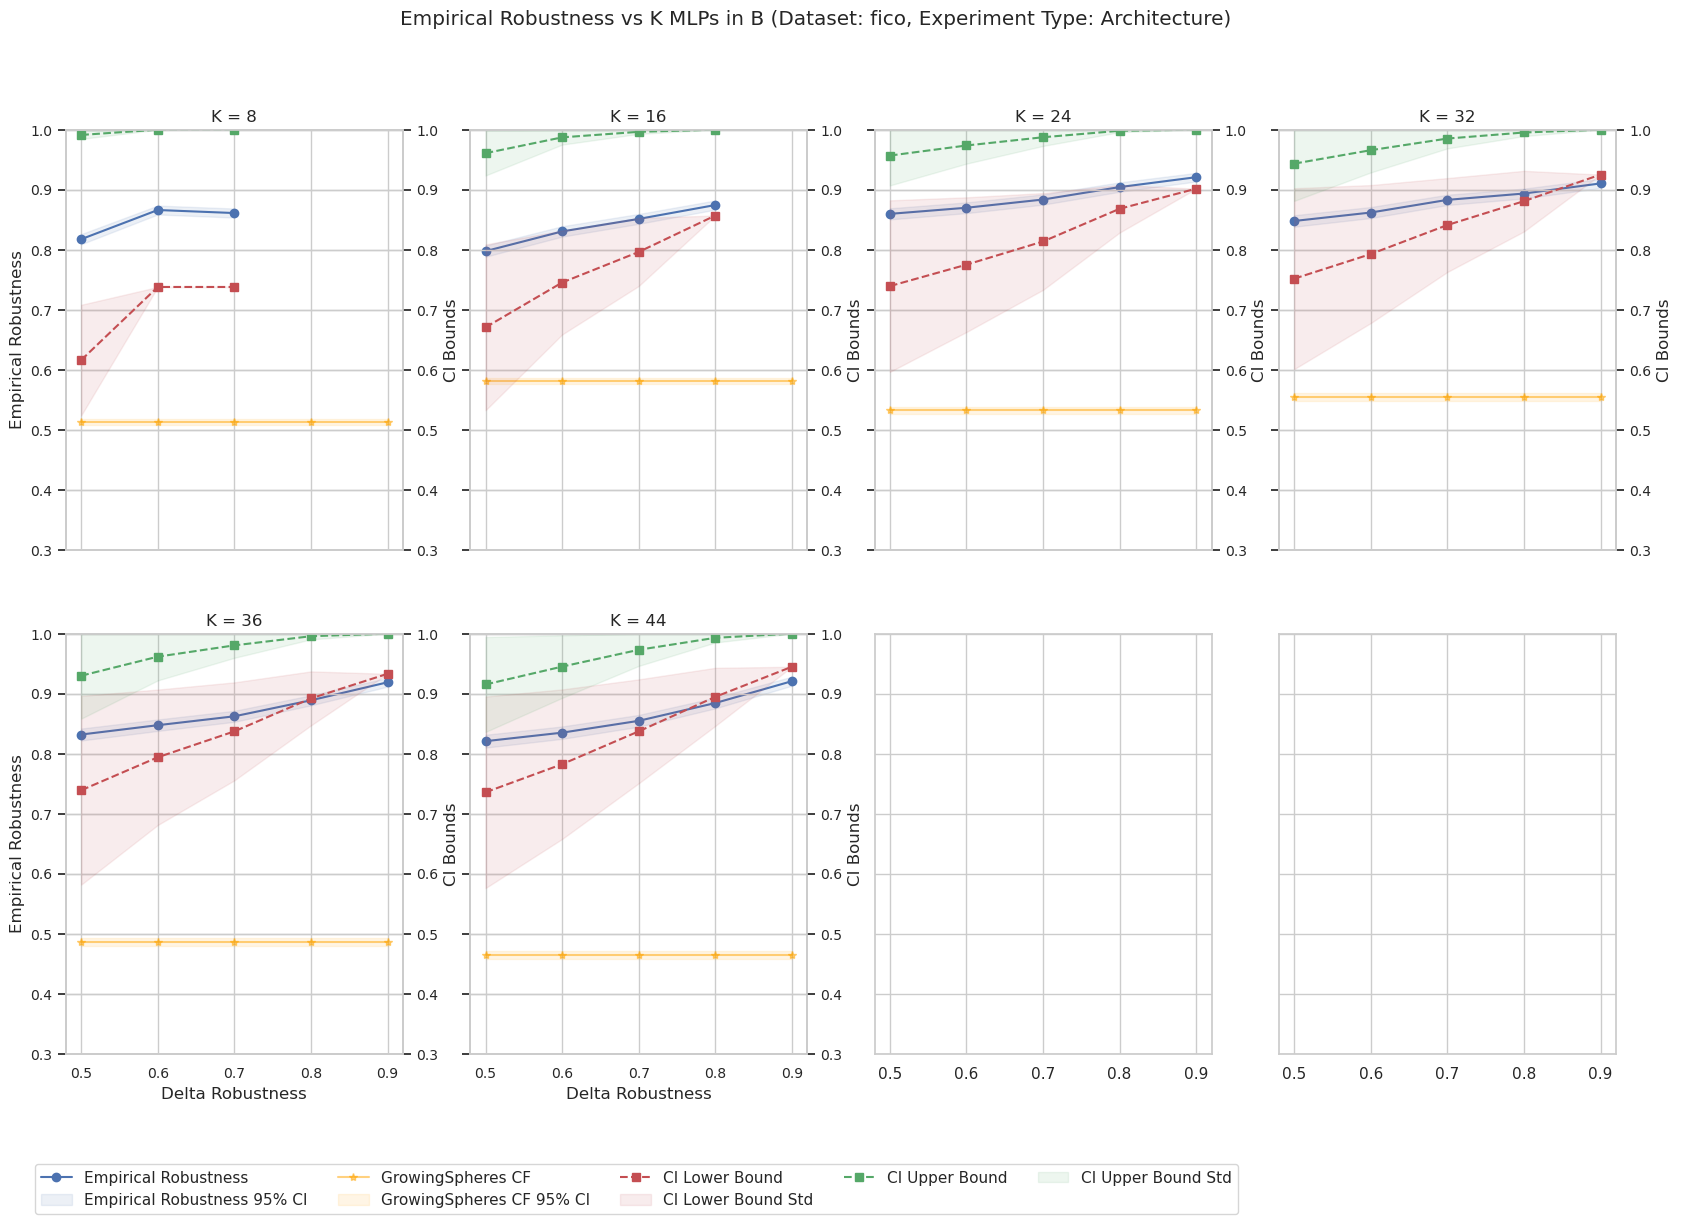

In [56]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
method='GrowingSpheres'

ks = sorted(_tmp_df['k_mlps_in_B'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df['k_mlps_in_B'] == k)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'K = {k}')
    
    if i >= 4:
        ax.set_xlabel('Delta Robustness')
    # ax.set_xlabel('Delta Robustness')
    if i == 0 or i == 4:
        ax.set_ylabel('Empirical Robustness')
    
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if j == len(experiment_types) - 1:
        ax2.set_ylabel('CI Bounds')
    
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
    
    
    #Plot baseline
    for m, color in zip(['GrowingSpheres'], ['orange']):
        __df = _df[_df['base_cf_method'] == m]
        base = __df['base_counterfactual_validity_model2'].mean()
        base_std = __df['base_counterfactual_validity_model2'].std()
        base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
        ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
        ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
    
    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
    
    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
        
        ax.legend(ax_legend_handles + ax2_legend_handles, 
                    ax_legend_labels + ax2_legend_labels, 
                    ncol=5, 
                    loc='lower right',
                    bbox_to_anchor=(3.5, -0.4)
        )
        
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])


dataset =  _tmp_df['dataset_name'].unique()[0]
experiment_type = _tmp_df['experiment_type'].unique()[0]
plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')        
plt.savefig(f'{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [57]:
generalization_results_path = results_path + '/generalization'
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


In [58]:
gen_raw_df['experiment_type'].value_counts()

Architecture    18701
Name: experiment_type, dtype: int64

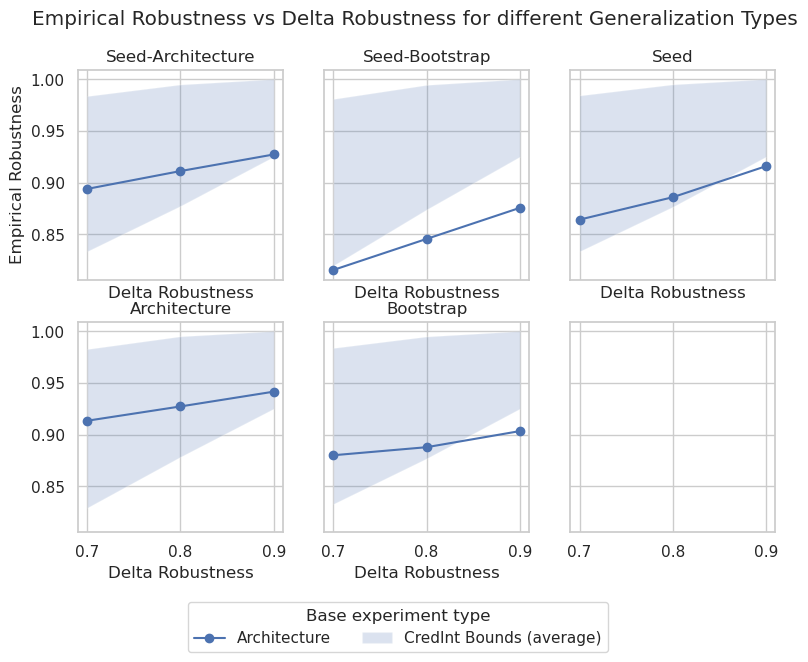

In [86]:
generalizations = gen_raw_df['experiment_generalization_type'].unique()
experiments = gen_raw_df['experiment_type'].unique()

cols = len(generalizations) // 2 + 1
fig, axes = plt.subplots(ncols=cols, nrows=2, figsize=(9, 6), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[(tmp_gen_df['experiment_type'] == experiment) & (tmp_gen_df['experiment_generalization_type'] == gen)]

        lbs = tmp_gen_df['lower_bound_beta']
        ubs = tmp_gen_df['upper_bound_beta']
        
        tmp_grp = tmp_gen_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()

        axes[i].plot(tmp_grp.index, tmp_grp, marker='o', linestyle='-', label=experiment)
        
        tmp_grp_lower = tmp_gen_df.groupby('delta_robustness')['lower_bound_beta'].mean()
        tmp_grp_upper = tmp_gen_df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        axes[i].fill_between(tmp_grp.index, tmp_grp_lower, tmp_grp_upper, alpha=0.2, label='CredInt Bounds (average)')
        
        axes[i].set_title(gen)
        axes[i].set_xlabel('Delta Robustness')
        
        if i == 0:
            axes[i].set_ylabel('Empirical Robustness')
            
        if i == 3:
            axes[i].legend(title='Base experiment type', loc='upper left', ncol=2, bbox_to_anchor=(0.5, -0.3))
        
            
plt.suptitle('Empirical Robustness vs Delta Robustness for different Generalization Types')

# plt.tight_layout()

plt.savefig(f'{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png', dpi=300, bbox_inches='tight')
        

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

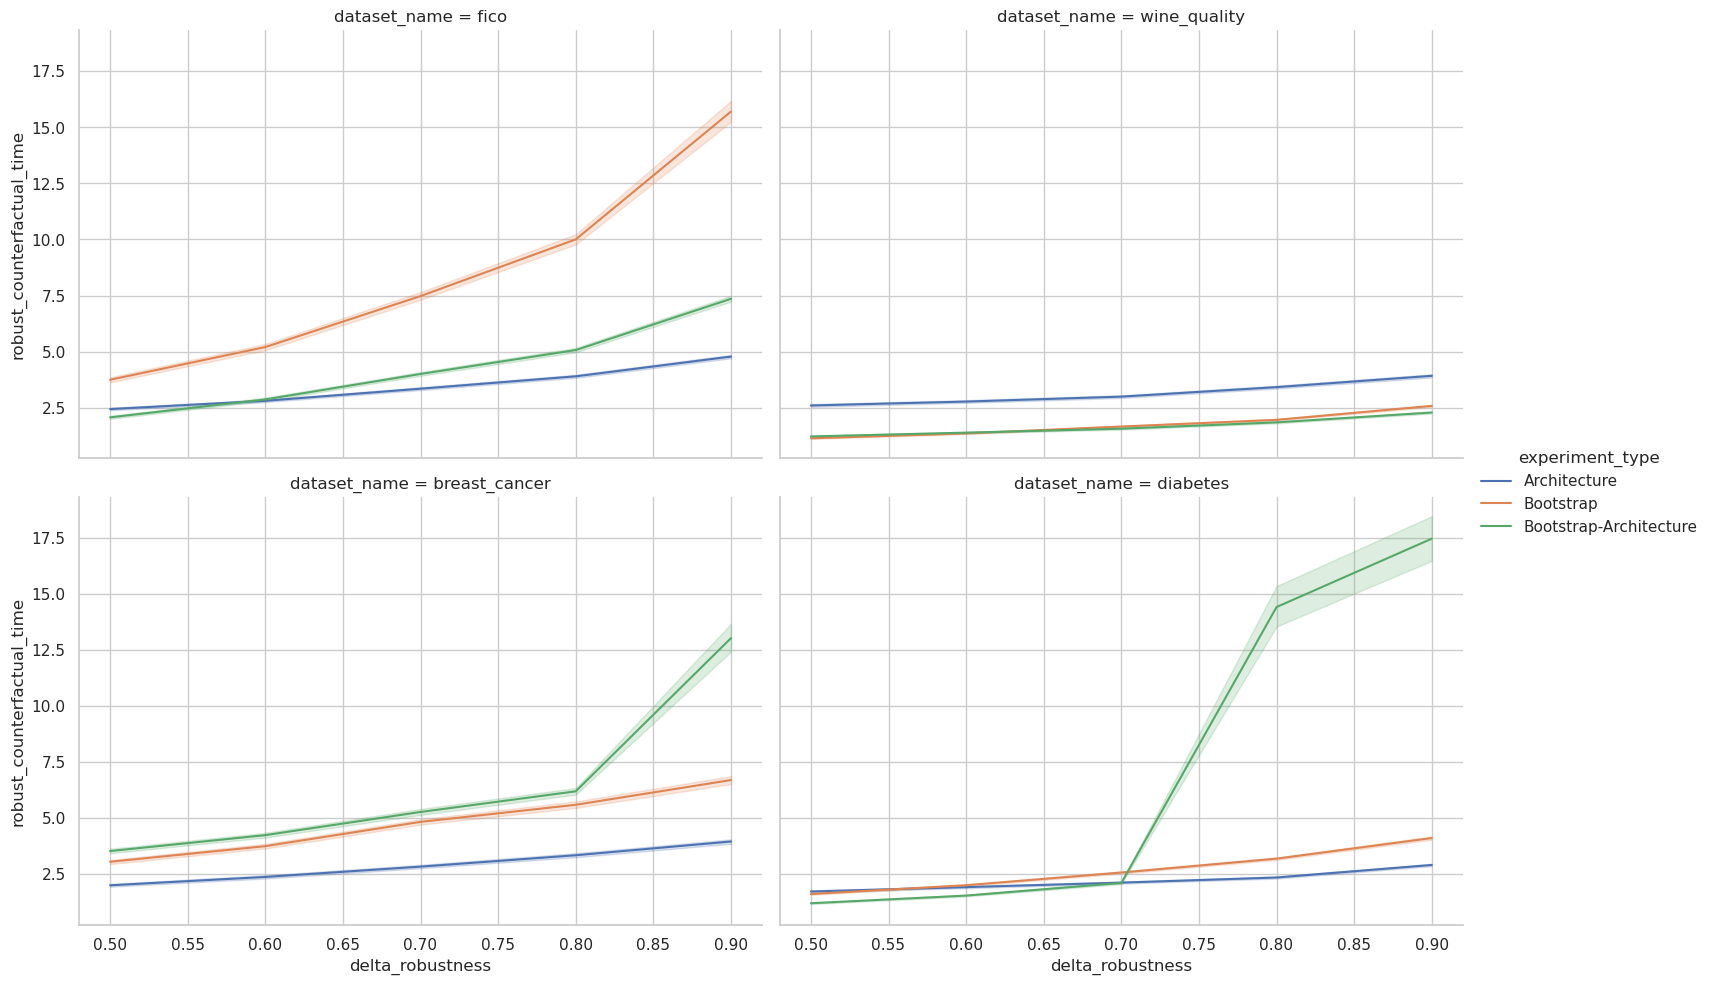

In [61]:
sns.relplot(data=nn_gs_df, x='delta_robustness', y='robust_counterfactual_time', hue='experiment_type', col='dataset_name', kind='line', height=5, aspect=1.5, col_wrap=2)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_1_robust_cf_generation_time_delta.png', dpi=300, bbox_inches='tight')

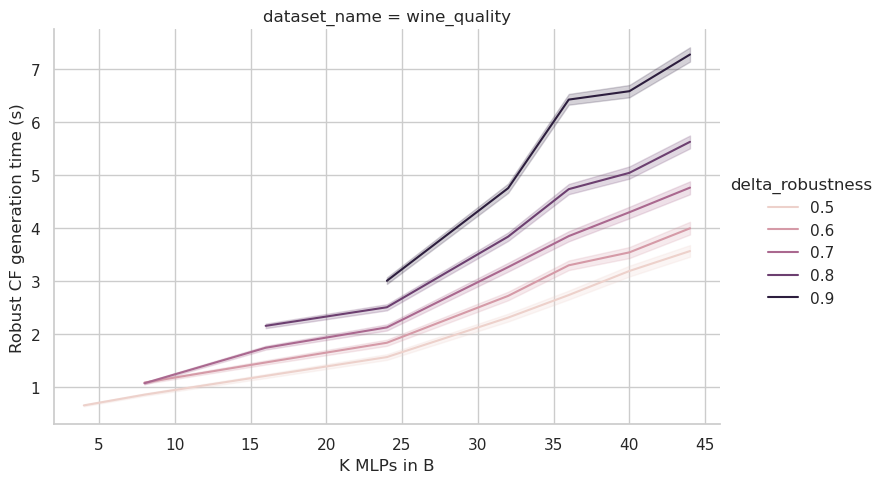

In [202]:
sns.relplot(data=k_raw_df, x='k_mlps_in_B', y='robust_counterfactual_time', hue='delta_robustness', col='dataset_name', kind='line', height=5, aspect=1.5)
plt.xlabel('K MLPs in B')
plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_2_robust_cf_generation_time_k.png', dpi=300, bbox_inches='tight')

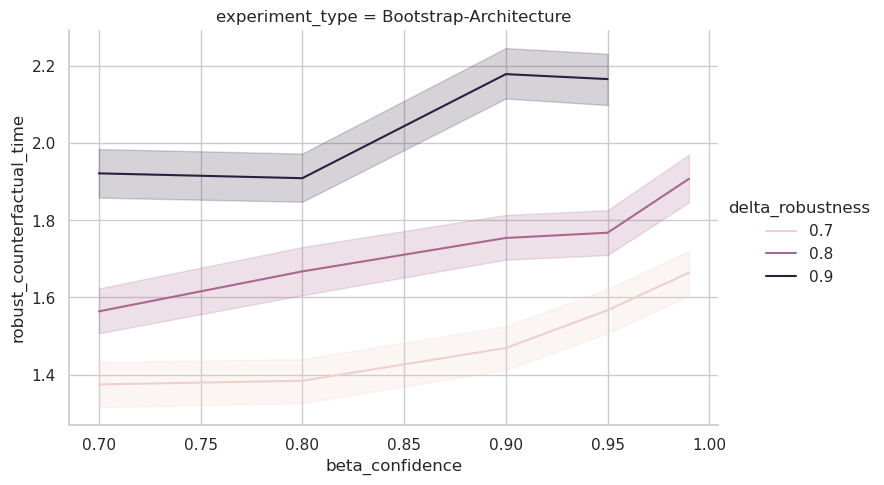

In [203]:
sns.relplot(data=conf_sweep_raw_df, x='beta_confidence', y='robust_counterfactual_time', hue='delta_robustness', col='experiment_type', kind='line', height=5, aspect=1.5)
plt.savefig(f'{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png', dpi=300, bbox_inches='tight')

In [71]:
# Create a scatterplot time vs empirical robustness

# Print average time for each experiment type
print('BetaROB Time')
tmp_beta = raw_df[raw_df['experiment_type'] == 'Bootstrap-Architecture'] 
quantile80 = tmp_beta['robust_counterfactual_time'].quantile(0.8)
quantile20 = tmp_beta['robust_counterfactual_time'].quantile(0.2)
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] < quantile80]
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] > quantile20]
print(tmp_beta.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('RobX Time')
tmp_robx = robx_raw_df[robx_raw_df['experiment_type'] == 'Bootstrap-Architecture']
quantile80 = tmp_robx['robust_counterfactual_time'].quantile(0.8)
quantile20 = tmp_robx['robust_counterfactual_time'].quantile(0.2)
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] < quantile80]
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] > quantile20]
print(tmp_robx.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('Base CF Time')
tmp_base = raw_df[raw_df['experiment_type'] == 'Bootstrap-Architecture']
quntile80 = tmp_base['base_counterfactual_time'].quantile(0.8)
quantile20 = tmp_base['base_counterfactual_time'].quantile(0.2)
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] < quantile80]
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] > quantile20]
print(tmp_base.groupby(['experiment_type', 'dataset_name'])['base_counterfactual_time'].mean().sort_index())

BetaROB Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    3.256238
                        diabetes         2.677782
                        fico             3.252531
                        wine_quality     2.232091
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    0.559444
                        fico             1.093544
                        wine_quality     0.818190
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type         dataset_name 
Bootstrap-Architecture  breast_cancer    0.007350
                        diabetes         0.003639
                        fico             0.007058
                        wine_quality     0.002796
Name: base_counterfactual_time, dtype: float64
